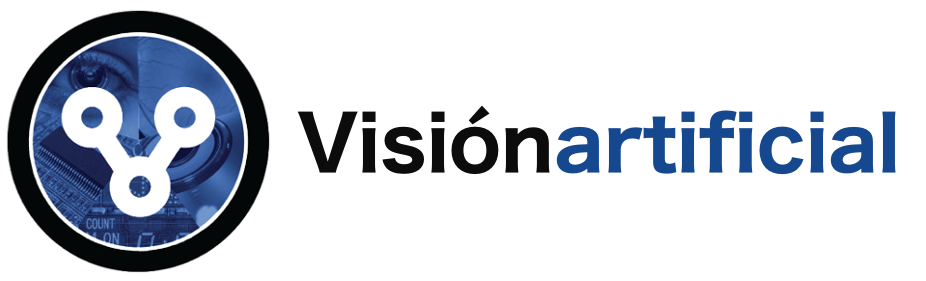

# OpenCV 

### para a materia de Visión Artificial do Grao de Robótica. EPSE de Lugo.

# <h1 style="font-size:30px;">Operacións aritméticas</h1>

Neste caderno cubriremos **operacións aritméticas** que inclúen a suma, resta e multiplicación de imaxes por un escalar. Tamén veremos algúns resultados inesperados que se producen ao realizar estas operacións e como resolvelas. 

### <font style="color:rgb(200,0,0)">**Nota:** Para presentación executa: jupyter nbconvert empezando_con_imaxes.ipynb --to slides --post serve </font>


# <font style = "color: rgb (50,120,229)"> Conversión de tipos de datos </font>
Antes de entrar en operacións matemáticas, é moi importante comprender os tipos de datos empregados e como converter dun a outro.

Como vimos nos módulos anteriores, unha imaxe represéntase como unha matriz numpy unha vez cargada a través da función **`cv2.imread`**. O tipo de datos predeterminado deste obxecto é **np.uint8** (**8 bits**). Para a maioría das operacións aritméticas, como a multiplicación ou división, necesitamos converter o tipo de matriz a float onde cada pixel pode ter **6, 32 ou 64 bits** de precisión. Isto axuda a evitar o desbordamento mentres se traballa coas imaxes.

# <font style="color:rgb(50,120,229)">Importamos as librerias necesarias</font>

In [3]:
# Importamos as librerias
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

In [4]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

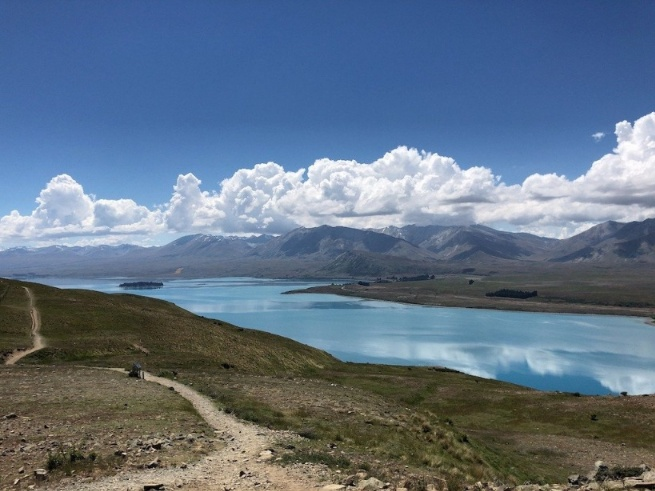

In [5]:
# <font style="color:rgb(50,120,229)">Lemos a imaxe e a visualizamos</font>
image = './data/new-zealand-lake.jpg'
img = cv2.imread(image, cv2.IMREAD_COLOR)
Image(filename=image, width='400')


# 1. Suma / resta: afecta ao brilo da imaxe
Engadir un valor constante á intensidade de cada píxel nunha imaxe aumentará o brillo da imaxe. Do mesmo xeito, restar un valor constante de cada píxel diminuirá a claridade dunha imaxe. 
Se $ I $ é a imaxe de entrada e $ I_o $ é a imaxe de saída, a imaxe mellorada: 
$$
I_o = I + \beta
$$

Podemos usar as funcións **`add ()` ** e **`subtract()`** de OpenCV para realizar estas operacións nas imaxes.

<hr style = "border: none; height: 4px; background-color: # D3D3D3" />

### <font color = "green"> Sintaxe das funcións </font>
```Python
dst = cv2.add (src1, src2 [, dst [, mask [, dtype]]])
```

`dst`: é a imaxe de saída do mesmo tamaño e profundidade que `src1` e `src2`.

A función ten **2 argumentos requiridos**:

1. `src1`: primeira matriz de entrada ou un escalar.
2. `src2`: segunda matriz de entrada ou un escalar do mesmo tamaño e do mesmo tipo que src1.

A función ten ** 2 argumento opcional **:
1. `mask`: máscara de operación opcional - matriz cunha canle única de 8 bits, que especifica elementos da matriz de saída que se van cambiar.
2. `dtype`: profundidade opcional da matriz de saída.

### <font color = "green"> Documentación OpenCV </font>
[**`add()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga10ac1bfb180e2cfda1701d06c24fdbd6)
[**`subtract()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#gaa0f00d98b4b5edeaeb7b8333b2de353b)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />


Text(0.5, 1.0, 'Brilante')

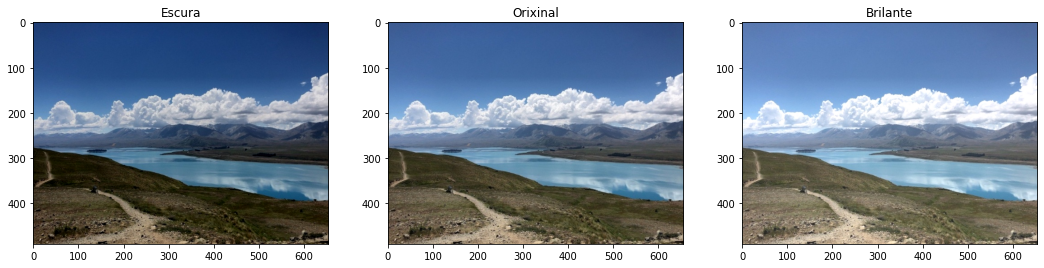

In [6]:
# Creamos a matriz con intensidade constante
matrix = np.ones(img.shape, dtype = 'uint8') * 30

# Creamos as imaxes máis brilante e máis escura.
img_brighter = cv2.add(img, matrix)
img_darker   = cv2.subtract(img, matrix)

# Visualizamos as imaxes
plt.figure(figsize = [18,5])
plt.subplot(131); plt.imshow(img_darker[:, :, ::-1]);   plt.title('Escura')
plt.subplot(132); plt.imshow(img[:, :, ::-1]);          plt.title('Orixinal')
plt.subplot(133); plt.imshow(img_brighter[:, :, ::-1]); plt.title('Brilante')

# 2. Multiplicación: afecta ao contraste da imaxe
Multiplicar os valores de intensidade dunha imaxe por un valor constante ( $ \alpha $ maior ou inferior a 1) producirá un cambio no contraste da imaxe. 
  $$
  I_o = \alpha I
  $$ 

O contraste defínese pola diferenza nos valores de intensidade nunha imaxe. Considere o lago azul e o primeiro plano máis escuro da imaxe. Digamos que a intensidade do lago é 150 e a do primeiro plano é 100. Percibimos a diferenza entre estes dous valores como unha medida do contraste na imaxe. Neste caso, a diferenza é de 50. Multiplicando cada un por un factor de 1,5, resultaría 225 para o lago e 150 para o primeiro plano. A diferenza resultante despois desta multiplicación é agora de 75, que ten un contraste maior en comparación coa imaxe orixinal. Se se multiplica por un factor inferior a un, obtense unha imaxe de menor contraste.






<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font color="green">Sintaxe da función </font>
``` python
dst = cv2.multiply(src1, src2[, dst[, scale[, dtype]]])
```
`dst`: É a imaxe de saída coa mesma mensura e profundidade ca `src1` e `src2`.

A función ten  **2 argumentos requiridos**:

1. `src1`: primeiro array de entrada.
2. `src2`: segundo array de entrada do mesmo tamaño e tipo ca src1.

A función ten **2 argumento opcionais**:
1. `scale`: factor polo que se modula o produto de `src1` e `src2`.
2. `dtype`: profundidade para o array de saída.

### <font color="green">Documentación de OpenCV</font>


[**`multiply()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga979d898a58d7f61c53003e162e7ad89f)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font style="color:rgb(50,120,230)">Modificamos o contraste da imaxe<font/> 

Text(0.5, 1.0, 'Contraste alto')

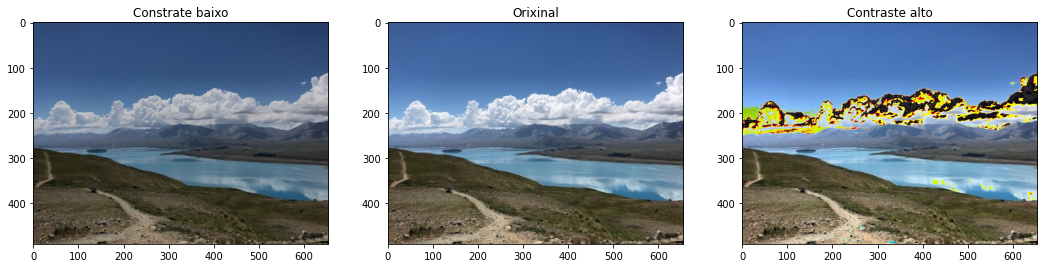

In [7]:
# Creamos dúas matrices do mesmo tamaño.
matrix1 = np.ones(img.shape) * 0.8
matrix2 = np.ones(img.shape) * 1.2

# Creamos as imaxes cun contraste alto e baixo.
img_lower  = np.uint8(cv2.multiply(np.float64(img), matrix1))
img_higher = np.uint8(cv2.multiply(np.float64(img), matrix2))

# Visualizamos as imaxes.
plt.figure(figsize = [18,5])
plt.subplot(131); plt.imshow(img_lower[:, :, ::-1]);  plt.title('Constrate baixo')
plt.subplot(132); plt.imshow(img[:, :, ::-1]);        plt.title('Orixinal')
plt.subplot(133); plt.imshow(img_higher[:, :, ::-1]); plt.title('Contraste alto')

### <font style = "color: rgb (50,120,230)"> Que pasou aqui? </font>
Ten en conta que a imaxe de contraste alto anterior ten algunhas cores estrañas nas nubes. Cando a imaxe orixinal se multiplicou polo factor de escala, algúns valores de intensidade de píxeles superan o valor de 255. Entón, cando eses valores de punto flotante se converten a 8 bits sen signo empregando `np.uint8 ()`, produciuse unha condición de desbordamento e a conversión a `uint8` devolve valores nulos. Por exemplo,`np.uint8 (265.2)` converte o valor en coma flotante de 265.2 a 9. Podes verificalo co seguinte comando:`print(np.uint8 (265.2)) `

Entón, como podemos arranxalo?


Dado que as funcións de visualización esperan que as imaxes estean nalgún destes dous formatos:

     - Se a imaxe é flotante, o rango debería estar [0,1]. Calquera cousa superior a 255 considérase branca.
     - Se a imaxe é uint8, o rango debería estar [0,255]

temos dúas opcións para arranxar a visualización:

     - Reducir os valores de intensidade entre 0 ~ 255 e cambiar o tipo de datos a uint8.
     - Se se desexa manter a imaxe en formato flotante, normalizar os valores de instensidade entre [0,1]

### <font style = "color: rgb (50,120,230)"> Manexo do desbordamento usando np.clip () </font>
Neste caderno, para manexar a condición de desbordamento, empregaremos a función **`np.clip ()`** para recortar os valores multiplicados nun intervalo especificado antes de convertelo a **`uint8`**. 

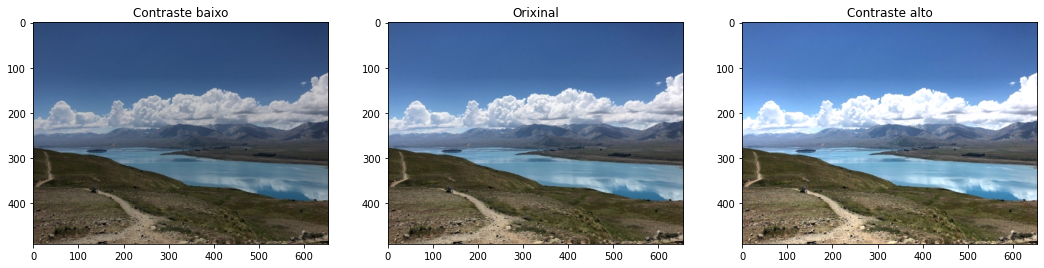

In [8]:
# Creamos dúas matrices do mesmo tamaño.
matrix1 = np.ones(img.shape) * 0.8
matrix2 = np.ones(img.shape) * 1.2

# Creamos unha imaxe de alta e baixo contraste.
img_lower   = np.uint8(cv2.multiply(np.float64(img), matrix1))
img_higher  = np.uint8(np.clip(cv2.multiply(np.float64(img), matrix2) , 0, 255))

# Visualizamos as imaxes.
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_lower[:, :, ::-1]);  plt.title('Contraste baixo')
plt.subplot(132); plt.imshow(img[:, :, ::-1]);        plt.title('Orixinal')
plt.subplot(133); plt.imshow(img_higher[:, :, ::-1]); plt.title('Contraste alto');

### <font style="color:rgb(50,120,230)">Empregando a opción de escala</font>

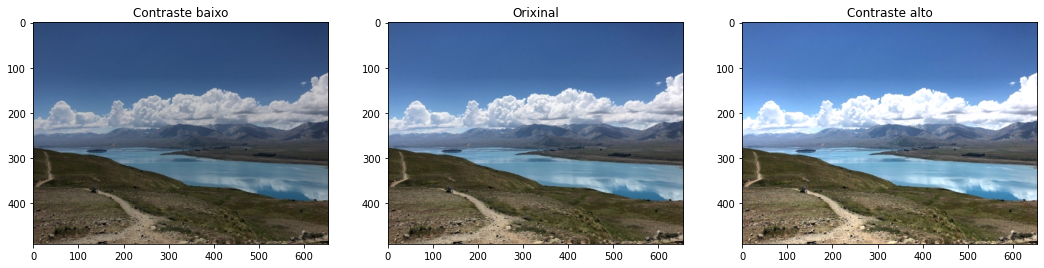

In [9]:
# Creamos unha matriz do mesmo tamaño que a orxinal e tipo 64 bits.
matrix_ones = np.ones(img.shape, dtype = 'float64')

# Creamos unha imaxe de alta e baixo contraste.
img_lower   = np.uint8(cv2.multiply(np.float64(img), matrix_ones, scale = 0.8))
img_higher  = np.uint8(np.clip(cv2.multiply(np.float64(img), matrix_ones, scale = 1.2) , 0, 255))

# Visualizamos as imaxes.
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_lower[:, :, ::-1]);  plt.title('Contraste baixo')
plt.subplot(132); plt.imshow(img[:, :, ::-1]);        plt.title('Orixinal')
plt.subplot(133); plt.imshow(img_higher[:, :, ::-1]); plt.title('Contraste alto');

# 7. Exercicios

Completa o código na celda de abaixo.


In [29]:
# Lemos a imaxe ('Santorini.jpg')
image = './data/Santorini.jpg'
img = cv2.imread(image, cv2.IMREAD_COLOR)

# crea unha matriz de uns (tipo float64)
# matrix_ones = 

# Crea dúas imaxes de distintos contraste empregano a opción de 'scale' con factores de 1.1 e 1.2 (sen fixar overflow)
# CÓDIGO AQUI
# img_higher1  = 
# img_higher2  = 

# Visualiza as imaxes (orixinal, alto (1.1x) , máis alto (1.2x))
# CÓDIGO AQUI
# plt.figure(figsize=[18,5])


# Crea dúas imaxe con contrastes altor de factores 1.1 e 1.2 (mprega np.clip() pare recortar os valores a 255)
# CÓDIGO AQUI
# img_higher1  = 
# img_higher2  = 

# Visualiza as imaxes (orixinal, alto (1.1x) clipped , máis alto (1.2x) clipped)
# CÓDIGO AQUI
# plt.figure(figsize=[18,5])

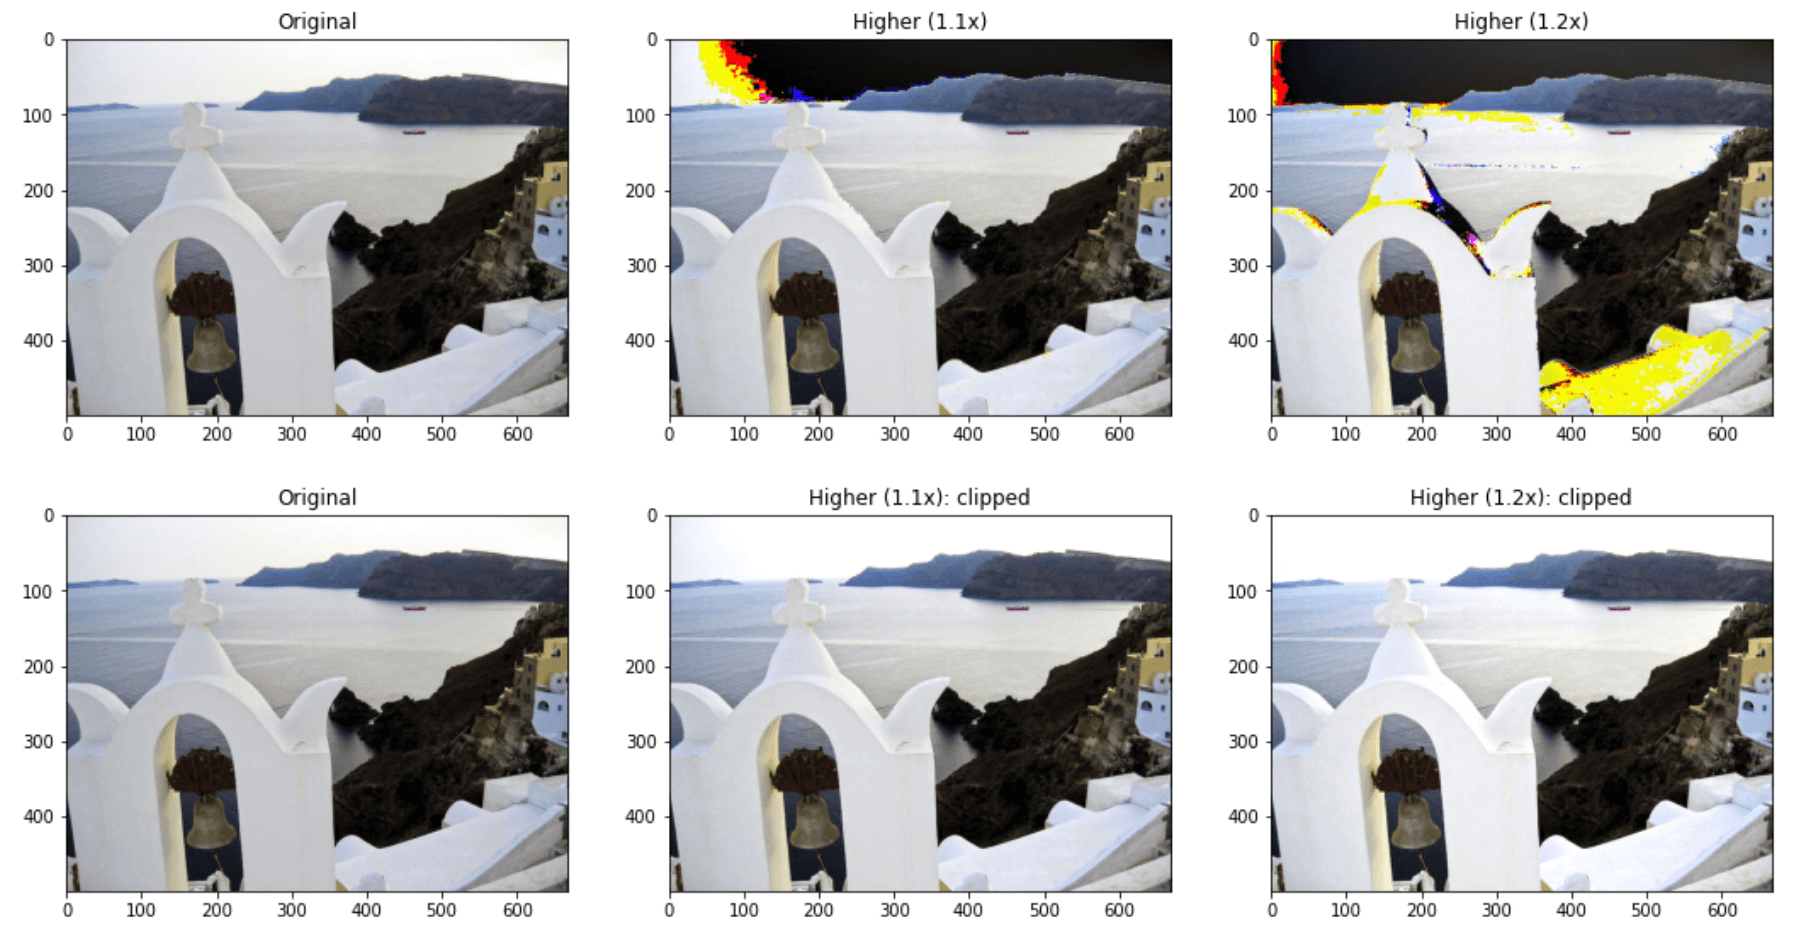